# DPCL_cisTopicObject_3K_fragments_80_cells

In [34]:
#import time
t1_start = time.time()
t1_start

1667928927.1526802

2022-11-08 18:35:56,641 cisTopic     INFO     Formatting input to corpus
2022-11-08 18:35:56,669 gensim.corpora.dictionary INFO     adding document #0 to Dictionary<0 unique tokens: []>
2022-11-08 18:35:57,037 gensim.corpora.dictionary INFO     built Dictionary<89724 unique tokens: ['0', '1', '2', '3', '4']...> from 80 documents (total 132436 corpus positions)
2022-11-08 18:35:57,039 cisTopic     INFO     Running model with 2 topics
2022-11-08 18:35:57,043 LDAMalletWrapper INFO     MALLET corpus already exists, training model
2022-11-08 18:35:57,044 LDAMalletWrapper INFO     Training MALLET LDA with mallet train-topics --input /scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_3K_fragments_80_cells/corpus.mallet --num-topics 2  --alpha 50 --beta 0.1 --optimize-interval 0 --num-threads 20 --output-state /scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_3K_fragments_80_cells/eebd64_state.mallet.gz --output-doc-topics /scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopi

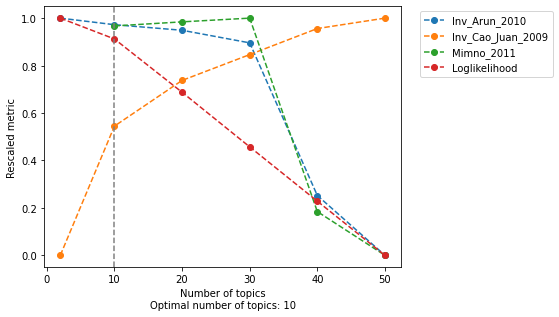

2022-11-08 18:37:37,366 cisTopic     INFO     Running UMAP
2022-11-08 18:37:38,222 cisTopic     INFO     Running FItSNE

Symmetrizing...
Using the given initialization.
Exaggerating Ps by 12.000000
Input similarities computed (sparsity = 0.517500)!
Learning embedding...
Using FIt-SNE approximation.
Iteration 50 (50 iterations in 0.49 seconds), cost 2.182670
Iteration 100 (50 iterations in 0.47 seconds), cost 1.955511
Iteration 150 (50 iterations in 0.46 seconds), cost 2.536194
Iteration 200 (50 iterations in 0.40 seconds), cost 2.200899
Iteration 250 (50 iterations in 0.42 seconds), cost 2.102810
Unexaggerating Ps by 12.000000
Iteration 300 (50 iterations in 0.44 seconds), cost 1.851588
Iteration 350 (50 iterations in 0.48 seconds), cost 1.126482
Iteration 400 (50 iterations in 0.48 seconds), cost 0.628954
Iteration 450 (50 iterations in 0.49 seconds), cost 0.297903
Iteration 500 (50 iterations in 0.47 seconds), cost 0.278583
Iteration 550 (50 iterations in 0.49 seconds), cost 0.270088

<Figure size 460.8x345.6 with 0 Axes>

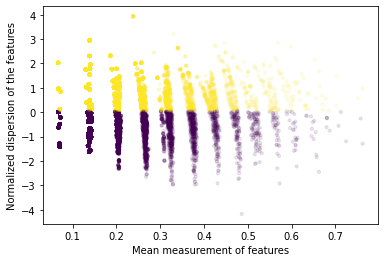

2022-11-08 18:37:55,881 cisTopic     INFO     Done!


2022-11-08 18:37:59,421	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=20139) 2022-11-08 18:38:03,658 cisTopic     INFO     Formatting data for IMR90
(markers_ray pid=20139) 2022-11-08 18:38:03,686 cisTopic     INFO     Computing p-value for IMR90
(markers_ray pid=20145) 2022-11-08 18:38:03,646 cisTopic     INFO     Formatting data for GM12878
(markers_ray pid=20145) 2022-11-08 18:38:03,671 cisTopic     INFO     Computing p-value for GM12878
(markers_ray pid=20141) 2022-11-08 18:38:03,628 cisTopic     INFO     Formatting data for HCT116
(markers_ray pid=20141) 2022-11-08 18:38:03,653 cisTopic     INFO     Computing p-value for HCT116
(markers_ray pid=20142) 2022-11-08 18:38:03,703 cisTopic     INFO     Formatting data for MCF7
(markers_ray pid=20142) 2022-11-08 18:38:03,735 cisTopic     INFO     Computing p-value for MCF7
(markers_ray pid=20140) 2022-11-08 18:38:03,759 cisTopic     INFO     Formatting data for PC3
(markers_ray pid=20140) 2022-11-08 18:38:03,798 cisTopic     INFO     Computing p-value for PC3
(markers_ray pid=20144) 2022-1

In [36]:
# DPCL_cisTopicObject_3K_fragments_80_cells.py
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    import time
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    with open(outDir + 'cistopic_obj.pkl', 'wb') as f:
          pickle.dump(cistopic_obj, f)
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/low_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_3K_fragments_80_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/low_simulation/DPCL_cisTopicObject_3K_fragments_80_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_3K_fragments_80_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=10)

In [21]:
# DPCL_cisTopicObject_3K_fragments_80_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=1:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_3K_fragments_80_cells
#SBATCH --output=DPCL_cisTopicObject_3K_fragments_80_cells.out
#SBATCH --error=DPCL_cisTopicObject_3K_fragments_80_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_3K_fragments_80_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_3K_fragments_1K_cells

In [ ]:
# DPCL_cisTopicObject_3K_fragments_1K_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/low_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_3K_fragments_1K_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/low_simulation/DPCL_cisTopicObject_3K_fragments_1K_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_3K_fragments_1K_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=30)

In [21]:
# DPCL_cisTopicObject_3K_fragments_1K_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=3:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_3K_fragments_1K_cells
#SBATCH --output=DPCL_cisTopicObject_3K_fragments_1K_cells.out
#SBATCH --error=DPCL_cisTopicObject_3K_fragments_1K_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_3K_fragments_1K_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_3K_fragments_10K_cells

In [ ]:
# DPCL_cisTopicObject_3K_fragments_1K_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/low_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_3K_fragments_10K_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/low_simulation/DPCL_cisTopicObject_3K_fragments_10K_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_3K_fragments_10K_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=30)

In [21]:
# DPCL_cisTopicObject_3K_fragments_10K_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=10:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_3K_fragments_10K_cells
#SBATCH --output=DPCL_cisTopicObject_3K_fragments_10K_cells.out
#SBATCH --error=DPCL_cisTopicObject_3K_fragments_10K_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_3K_fragments_10K_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_3K_fragments_25K_cells

In [ ]:
# DPCL_cisTopicObject_3K_fragments_25K_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/low_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_3K_fragments_25K_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/low_simulation/DPCL_cisTopicObject_3K_fragments_25K_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_3K_fragments_25K_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=30)

In [21]:
# DPCL_cisTopicObject_3K_fragments_25K_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=10:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_3K_fragments_25K_cells
#SBATCH --output=DPCL_cisTopicObject_3K_fragments_25K_cells.out
#SBATCH --error=DPCL_cisTopicObject_3K_fragments_25K_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_3K_fragments_25K_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_10K_fragments_80_cells

In [ ]:
# DPCL_cisTopicObject_10K_fragments_80_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/medium_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_10K_fragments_80_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/medium_simulation/DPCL_cisTopicObject_10K_fragments_80_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_10K_fragments_80_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=10)

In [21]:
# DPCL_cisTopicObject_10K_fragments_80_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-type=ALL
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=1:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_10K_fragments_80_cells
#SBATCH --output=DPCL_cisTopicObject_10K_fragments_80_cells.out
#SBATCH --error=DPCL_cisTopicObject_10K_fragments_80_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_10K_fragments_80_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_10K_fragments_1K_cells

In [ ]:
# DPCL_cisTopicObject_10K_fragments_1K_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/medium_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_10K_fragments_1K_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/medium_simulation/DPCL_cisTopicObject_10K_fragments_1K_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_10K_fragments_1K_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=30)

In [21]:
# DPCL_cisTopicObject_10K_fragments_1K_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-type=ALL
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=6:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_10K_fragments_1K_cells
#SBATCH --output=DPCL_cisTopicObject_10K_fragments_1K_cells.out
#SBATCH --error=DPCL_cisTopicObject_10K_fragments_1K_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_10K_fragments_1K_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_10K_fragments_10K_cells

In [ ]:
# DPCL_cisTopicObject_10K_fragments_10K_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/medium_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_10K_fragments_10K_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/medium_simulation/DPCL_cisTopicObject_10K_fragments_10K_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_10K_fragments_10K_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=30)

In [21]:
# DPCL_cisTopicObject_10K_fragments_10K_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-type=ALL
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=10:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_10K_fragments_10K_cells
#SBATCH --output=DPCL_cisTopicObject_10K_fragments_10K_cells.out
#SBATCH --error=DPCL_cisTopicObject_10K_fragments_10K_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_10K_fragments_10K_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_10K_fragments_25K_cells

In [ ]:
# DPCL_cisTopicObject_10K_fragments_25K_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/medium_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_10K_fragments_25K_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/medium_simulation/DPCL_cisTopicObject_10K_fragments_25K_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_10K_fragments_25K_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=30)

In [21]:
# DPCL_cisTopicObject_10K_fragments_25K_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-type=ALL
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=10:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_10K_fragments_25K_cells
#SBATCH --output=DPCL_cisTopicObject_10K_fragments_25K_cells.out
#SBATCH --error=DPCL_cisTopicObject_10K_fragments_25K_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_10K_fragments_25K_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_20K_fragments_80_cells

In [ ]:
# DPCL_cisTopicObject_20K_fragments_80_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/high_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_20K_fragments_80_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/high_simulation/DPCL_cisTopicObject_20K_fragments_80_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_20K_fragments_80_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=10)

In [21]:
# DPCL_cisTopicObject_20K_fragments_80_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-type=ALL
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=1:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_20K_fragments_80_cells
#SBATCH --output=DPCL_cisTopicObject_20K_fragments_80_cells.out
#SBATCH --error=DPCL_cisTopicObject_20K_fragments_80_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_20K_fragments_80_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_20K_fragments_1K_cells

In [ ]:
# DPCL_cisTopicObject_20K_fragments_1K_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/high_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_20K_fragments_1K_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/high_simulation/DPCL_cisTopicObject_20K_fragments_1K_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_20K_fragments_1K_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=10)

In [21]:
# DPCL_cisTopicObject_20K_fragments_1K_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-type=ALL
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=1:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_20K_fragments_1K_cells
#SBATCH --output=DPCL_cisTopicObject_20K_fragments_1K_cells.out
#SBATCH --error=DPCL_cisTopicObject_20K_fragments_1K_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_20K_fragments_1K_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_20K_fragments_10K_cells

In [ ]:
# DPCL_cisTopicObject_20K_fragments_10K_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/high_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_20K_fragments_10K_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/high_simulation/DPCL_cisTopicObject_20K_fragments_10K_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_20K_fragments_10K_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=30)

In [21]:
# DPCL_cisTopicObject_20K_fragments_10K_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-type=ALL
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=10:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_20K_fragments_10K_cells
#SBATCH --output=DPCL_cisTopicObject_20K_fragments_10K_cells.out
#SBATCH --error=DPCL_cisTopicObject_20K_fragments_10K_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_20K_fragments_10K_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# DPCL_cisTopicObject_20K_fragments_25K_cells

In [ ]:
# DPCL_cisTopicObject_20K_fragments_25K_cells.py
from time import process_time
import pandas as pd
import psutil
from pycisTopic.lda_models import *
import os
import pickle
from pycisTopic.clust_vis import *
from pycisTopic.diff_features import *
from pycisTopic.topic_binarization import *
def run_pycisTopic(cistopic_obj,
                   variable,
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu', 
                   perplexity=30):
    # Create outDir
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    # Create tmpDir
    if not os.path.exists(tmpDir):
        os.makedirs(tmpDir)
    # Run models
    m1=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    path_to_mallet_binary='mallet'
    os.environ['MALLET_MEMORY'] = '100G'
    t1_start = time.time() 
    models=run_cgs_models_mallet(path_to_mallet_binary,
                        cistopic_obj,
                        n_topics=n_topics,
                        n_cpu=n_cpu,
                        n_iter=n_iter,
                        random_state=random_state,
                        alpha=alpha,
                        alpha_by_topic=alpha_by_topic,
                        eta=eta,
                        eta_by_topic=eta_by_topic,
                        tmp_path=tmpDir, #Use SCRATCH if many models or big data set
                        save_path=tmpDir,
                        reuse_corpus=True)
    t1_stop = time.time()
    time_models = t1_stop-t1_start
    with open(outDir + 'models.pkl', 'wb') as f:
          pickle.dump(models, f)
    topics = ['Topic_'+str(model.parameters.loc['n_topics'][0]) for model in models]
    times = [model.parameters.loc['model_time'][0] for model in models]
    df = pd.DataFrame(times, index=topics, columns=['Time'])
    df.to_csv(outDir+'running_times_per_topic_model.tsv', sep='\t') 
    # Select model
    model=evaluate_models(models,
                         select_model=None, 
                         return_model=True, 
                         metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                         plot_metrics=False,
                         save= outDir + 'model_selection.pdf')
    # Add model to cisTopicObject
    cistopic_obj.add_LDA_model(model)
    m2=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # UMAP/tSNE
    t1_start = time.time() 
    cistopic_obj.projections['cell']={}
    run_umap(cistopic_obj,
                     target  = 'cell', scale=False)
    run_tsne(cistopic_obj,
                     target  = 'cell', scale=False, perplexity=perplexity)
    t1_stop = time.time()
    time_dr = t1_stop-t1_start
    m3=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Binarize topics
    t1_start = time.time() 
    region_bin_topics = binarize_topics(cistopic_obj, 
                                        method=method_binarization, 
                                        plot=False)
    t1_stop = time.time()
    time_bin = t1_stop-t1_start
    m4=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    with open(outDir + 'binarized_topic_region.pkl', 'wb') as f:
          pickle.dump(region_bin_topics, f)
    # Imputed accessibility
    t1_start = time.time() 
    imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)
    t1_stop = time.time()
    time_impute = t1_stop-t1_start
    m5=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Calculate DARs
    normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)
    variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                               min_disp = 0.05,
                                               min_mean = 0.0125, 
                                               max_mean = 3,
                                               max_disp = np.inf,
                                               n_bins=20, 
                                               n_top_features=None,
                                               plot=True,
                                               save= outDir + 'HVR_plot.pdf')
    t1_start = time.time() 
    markers_dict= find_diff_features(cistopic_obj, 
                          imputed_acc_obj,
                          variable=variable,
                          var_features=variable_regions,
                          contrasts=None,
                          adjpval_thr=0.05,
                          log2fc_thr=np.log2(1.5),
                          n_cpu=8) 
    t1_stop = time.time()
    time_dars = t1_stop-t1_start
    m6=psutil.Process().memory_info().rss / (1024 * 1024) / 1000
    # Save
    with open(outDir + 'Imputed_accessibility.pkl', 'wb') as f:
      pickle.dump(imputed_acc_obj, f)
    with open(outDir + 'DARs.pkl', 'wb') as f:
      pickle.dump(markers_dict, f)
    time = [time_models, time_dr, time_bin, time_impute, time_dars]
    df = pd.DataFrame(time, index=['Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Time'])
    df.to_csv(outDir+'running_times.tsv', sep='\t') 
    memory=[m1,m2,m3,m4,m5,m6]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'cummulative_memory.tsv', sep='\t')  
    memory=[m1,m2-m1,m3-m2,m4-m3,m5-m4,m6-m5]
    df = pd.DataFrame(memory, index=['Object', 'Models', 'Dimensionality_reduction', 'Topic_binarization', 'Imputation', 'DARs'], columns=['Memory'])
    df.to_csv(outDir+'memory_per_step.tsv', sep='\t')  
    
    
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/high_simulation/' 
import pickle
infile = open(dataDir + 'DPCL_cisTopicObject_20K_fragments_25K_cells.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Variable
cistopic_obj.cell_data['cell_type'] = [x.split('_')[0] for x in cistopic_obj.cell_data.barcode]
# outDir
outDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/high_simulation/DPCL_cisTopicObject_20K_fragments_25K_cells/' 
# tmpDir
tmpDir = '/scratch/leuven/313/vsc31305/speed_test/DPCL_cisTopicObject_20K_fragments_25K_cells/'
# Run function
run_pycisTopic(cistopic_obj,
                   'cell_type',
                   outDir,
                   tmpDir,
                   path_to_mallet_binary='mallet',
                   n_topics=[2, 10, 20, 30, 40, 50],
                   n_cpu=20,
                   n_iter=500,
                   random_state=500,
                   alpha=50,
                   alpha_by_topic=True,
                   eta=0.1,
                   eta_by_topic=False,
                   method_binarization='otsu',
                   perplexity=30)

In [21]:
# DPCL_cisTopicObject_20K_fragments_25K_cells.slurm
#!/bin/bash

#SBATCH --partition=batch
#SBATCH --cluster wice
#SBATCH --account lp_wice_pilot
#SBATCH --mail-type=ALL
#SBATCH --mail-user=carmen.bravogonzalezblas@kuleuven.be
#SBATCH --ntasks=1

#SBATCH --cpus-per-task=20
#SBATCH --time=10:00:00
#SBATCH --mem=180G

#SBATCH --job-name=DPCL_cisTopicObject_20K_fragments_25K_cells
#SBATCH --output=DPCL_cisTopicObject_20K_fragments_25K_cells.out
#SBATCH --error=DPCL_cisTopicObject_20K_fragments_25K_cells.err

singularity exec -B /lustre1,/staging,/data,/vsc-hard-mounts,/scratch,/local_scratch /data/leuven/software/biomed/singularity_images/scenicplus/scenicplus.sif python DPCL_cisTopicObject_20K_fragments_25K_cells.py

,Parameter
package,Mallet
n_topics,10
n_iter,500
random_state,500
alpha,50
alpha_by_topic,True
eta,0.1
top_topics_coh,5
full_time,14.232078
model_time,12.957997


# Explore dimensionality reduction

In [20]:
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/low_simulation/DPCL_cisTopicObject_3K_fragments_25K_cells/' 
import pickle
infile = open(dataDir + 'cistopic_obj.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

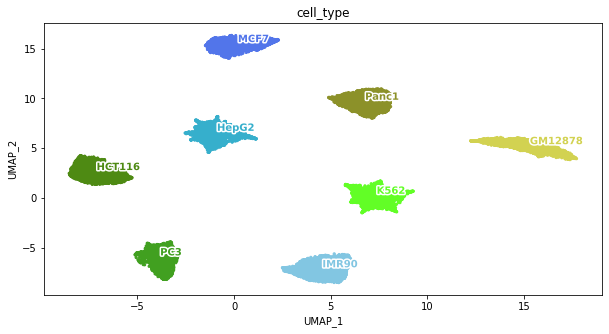

In [21]:
from pycisTopic.clust_vis import *
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['cell_type'], # Labels from RNA and new clusters
                 target='cell',
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5))

In [22]:
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/high_simulation/DPCL_cisTopicObject_20K_fragments_25K_cells/' 
import pickle
infile = open(dataDir + 'cistopic_obj.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

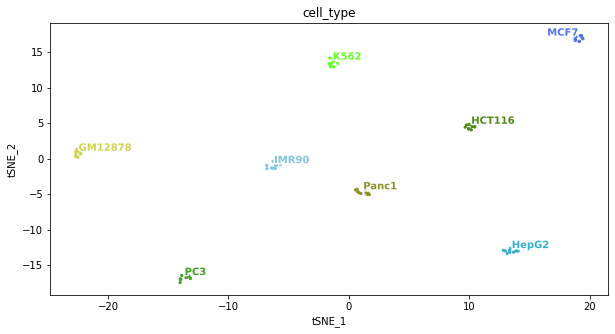

In [13]:
from pycisTopic.clust_vis import *
plot_metadata(cistopic_obj,
                 reduction_name='tSNE',
                 variables=['cell_type'], # Labels from RNA and new clusters
                 target='cell',
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5))

In [14]:
# Load cisTopic object
dataDir = '/staging/leuven/stg_00002/lcb/cbravo/Multiomics_pipeline/analysis/DPCL/speed_benchmark/medium_simulation/DPCL_cisTopicObject_10K_fragments_80_cells/' 
import pickle
infile = open(dataDir + 'cistopic_obj.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

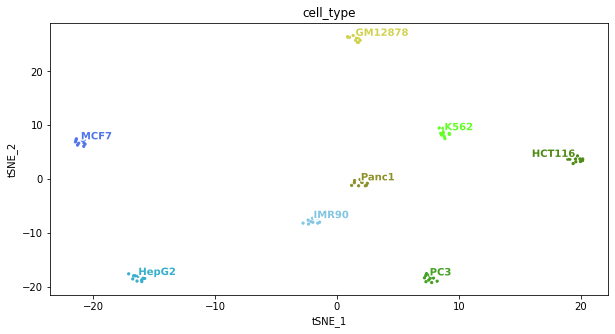

In [15]:
from pycisTopic.clust_vis import *
plot_metadata(cistopic_obj,
                 reduction_name='tSNE',
                 variables=['cell_type'], # Labels from RNA and new clusters
                 target='cell',
                 text_size=10,
                 dot_size=5,
                 figsize=(10,5))